# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Bank.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df.shape

(2512, 16)

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

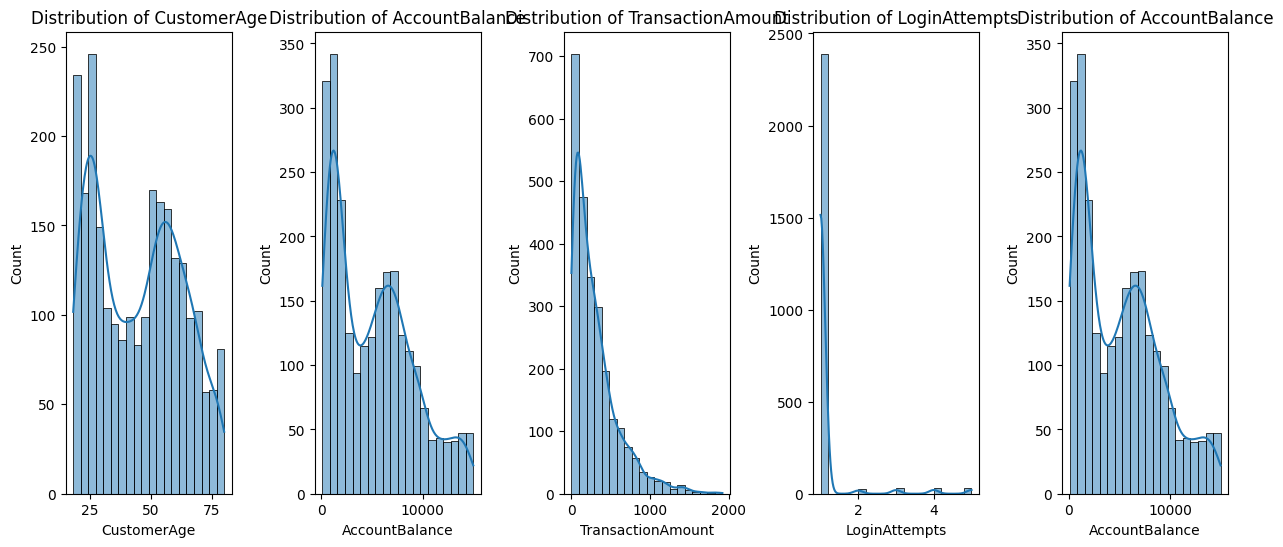

In [6]:
plt.figure(1, figsize=(15, 6))
n = 0

columns_to_plot = ['CustomerAge', 'AccountBalance', 'TransactionAmount', 'LoginAttempts' , 'AccountBalance']

for x in columns_to_plot:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
df[['CustomerAge', 'AccountBalance', 'TransactionAmount', 'LoginAttempts', 'AccountBalance']].describe()


,CustomerAge,AccountBalance,TransactionAmount,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,44.673965,5114.302966,297.593778,1.124602,5114.302966
std,17.792198,3900.942499,291.946243,0.602662,3900.942499
min,18.000000,101.250000,0.260000,1.000000,101.250000
25%,27.000000,1504.370000,81.885000,1.000000,1504.370000
50%,45.000000,4735.510000,211.140000,1.000000,4735.510000
75%,59.000000,7678.820000,414.527500,1.000000,7678.820000
max,80.000000,14977.990000,1919.110000,5.000000,14977.990000


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(" Data yang telah di Preprocessing:")
print(df.info())
print("\nPreview Data:")
print(df.head())

 Data yang telah di Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   in

In [10]:
# Fitur numerik
features = ['CustomerAge', 'TransactionAmount']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [11]:
numerical_cols = ['CustomerAge', 'AccountBalance', 'TransactionAmount']
df_numeric = df[numerical_cols].dropna()

df_cluster_ready = df.loc[df_numeric.index]
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_normalized)

df_cluster_ready['Cluster'] = kmeans.labels_
df_cluster_ready.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

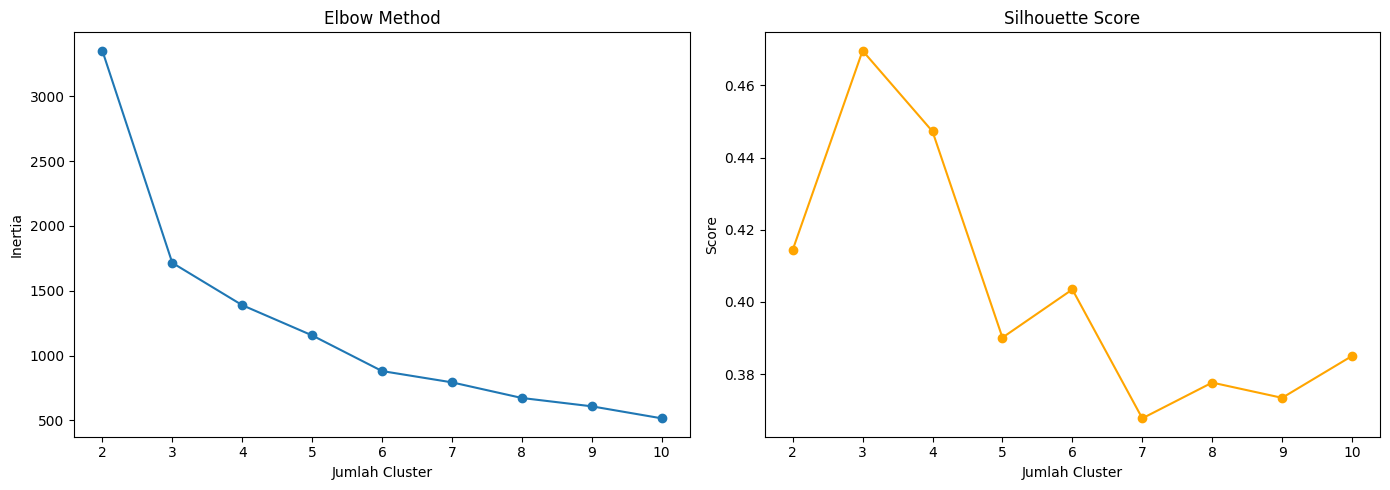

In [12]:

# Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [29]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['CustomerAge', 'TransactionAmount']])

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[df['Cluster'] == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_age = cluster_data['CustomerAge'].mean()
        mean_transaction = cluster_data['TransactionAmount'].mean()

        print(f"\nCluster {cluster_id + 0}:")
        print(f"Rata-rata Usia: {mean_age:.2f} tahun")
        print(f"Rata-rata Jumlah Transaksi: ${mean_transaction:.2f}")


analyze_clusters(df, k=2)

Analisis Karakteristik Setiap Cluster:

Cluster 0:
Rata-rata Usia: 43.69 tahun
Rata-rata Jumlah Transaksi: $778.40

Cluster 1:
Rata-rata Usia: 44.91 tahun
Rata-rata Jumlah Transaksi: $179.89


In [ ]:
X1 = df[['CustomerAge', 'TransactionAmount']].values

kmeans = KMeans(n_clusters=3, random_state=111)
labels = kmeans.fit_predict(X1)
te_avg = silhouette_score(X1, labels)
print(f"\nSilhouette Score: {te_avg:.2f}")


Silhouette Score: 0.60


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

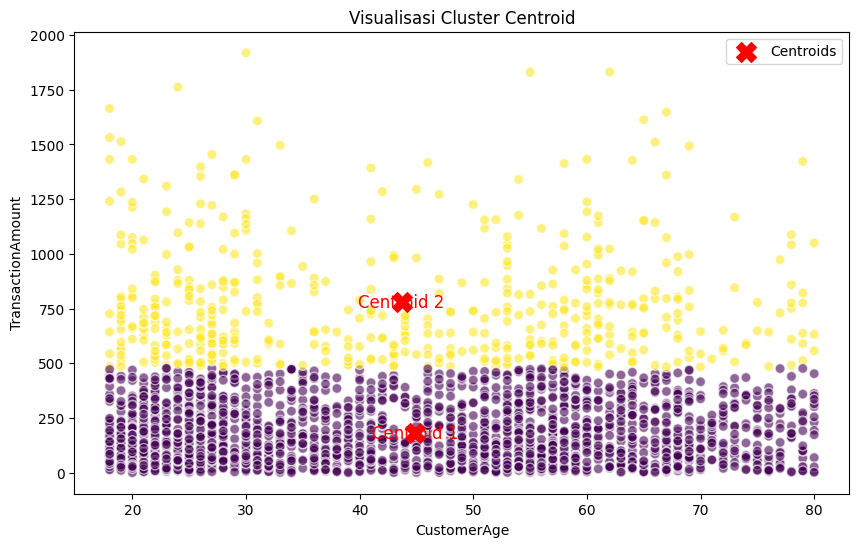

Nilai Centroids:
Centroid 1: Rata-rata Customer Age = 44.91, Rata-rata Transaction Amount = 179.89
Centroid 2: Rata-rata Customer Age = 43.69, Rata-rata Transaction Amount = 778.40


In [24]:
# Ambil fitur yang diperlukan
X = df[['CustomerAge', 'TransactionAmount']]

# Latih model KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Ambil label dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot data dan centroid
plt.figure(figsize=(10, 6))
plt.scatter(df['CustomerAge'], df['TransactionAmount'],
            c=labels, cmap='viridis', s=50, alpha=0.6,
            edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=200, marker='X', label='Centroids')

# Tambahkan teks di centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}',
             color='red', fontsize=12, ha='center', va='center')

# Tambahkan detail plot
plt.title('Visualisasi Cluster Centroid')
plt.xlabel('CustomerAge')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()

# Cetak nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Rata-rata Customer Age = {centroid[0]:.2f}, "
          f"Rata-rata Transaction Amount = {centroid[1]:.2f}")


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [41]:
df.groupby('Cluster')[['CustomerAge', 'TransactionAmount']].mean()


,CustomerAge,TransactionAmount
Cluster,,
0,43.694332,778.402854
1,44.913776,179.893241


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [37]:
from sklearn.preprocessing import StandardScaler

df_cleaned = df.copy()
numerical_columns = ['CustomerAge', 'TransactionAmount']
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned[numerical_columns])

scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

df_original = df.copy()
df_original[numerical_columns] = scaler.inverse_transform(df_cleaned[numerical_columns])
df_original['Cluster'] = df_cleaned['Cluster']

In [38]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['TransactionType', 'CustomerOccupation',]

# Membuat dictionary untuk menyimpan encoder tiap kolom
encoders = {}

# Encoding data kategorikal secara independen
df_cleaned = df.copy()
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df_cleaned[col] = encoders[col].fit_transform(df[col])  # Encoding tiap kolom

# Inverse transform untuk mengembalikan data ke bentuk aslinya
df_original = df_cleaned.copy()
for col in categorical_columns:
    df_original[col] = encoders[col].inverse_transform(df_cleaned[col])

# Menampilkan hasil setelah inverse transform
print(df_original.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [40]:

cluster_summary = df_original.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionType': lambda x: x.mode()[0],
    'Location': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'CustomerOccupation': lambda x: x.mode()[0]
})

Tulis hasil interpretasinya di sini.
1. Cluster 0:
*  Rata-rata Customer Age: 43.69
*  Rata-rata Transaction Amount: 778.40
2. Cluster 1:
*   Rata-rata Customer Age: 44.91
*   Rata-rata Transaction Amount: 179.85





# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Customer Age**: 43.69
- **Rata-rata Transaction Amount**: 778.40
- **Analisis:** Cluster ini merepresentasikan pelanggan dengan daya beli tinggi dan nilai transaksi yang besar. Mereka bisa dikategorikan sebagai pelanggan premium. Perusahaan dapat mempertahankan mereka melalui program loyalitas eksklusif, layanan prioritas, atau insentif khusus, karena mereka berpotensi memberikan kontribusi pendapatan yang signifikan dalam jangka panjang.

## Cluster 1:
- **Rata-rata Customer Age**: 44.91
- **Rata-rata Transaction Amount**: 179.89
- **Analisis:** Cluster ini terdiri dari pelanggan dengan nilai transaksi yang lebih rendah, namun dengan usia rata-rata yang hampir sama. Mereka cenderung stabil dan konsisten, menjadikannya kandidat yang baik untuk program retensi jangka panjang, seperti bundling produk, edukasi layanan, atau promosi yang meningkatkan frekuensi transaksi.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:
# Simpan dataframe yang sudah memiliki label cluster
df_cluster_ready.to_csv('hasil_clustering.csv', index=False)

print("Data berhasil disimpan ke dalam file 'hasil_clustering.csv'")

Data berhasil disimpan ke dalam file 'hasil_clustering.csv'
